## Present Value
---

The <font color=red>present value</font> of wealth $W(t)$ is defined as
$$
 PV(0)=B(t)W(t),
$$
where
$$
 B(t) = 
 \begin{cases}
 \displaystyle
  \frac1{\left(1+r\right)^t}, & (\text{one-year compound}), \\
 \displaystyle
  \frac1{\left(1+\frac{r}{M}\right)^{Mt}}, & \left(\frac1{M}\text{-year compound}\right) ,\\
  e^{-rt}, & (\text{continuous compound}).
 \end{cases}
$$

## Net Present Value
---
Suppose $C(0)$ is the amount of the initial investment for a project that will produce a cash flow $\{C(t_1),\dots,C(t_N)\}$. The <font color=red>net present value</font> (<font color=red>NPV</font>) of this project is defined as 

\begin{align*}
 NPV(0)
 &= C(0) + PV(0) \\
 &= C(0) + \sum_{n=1}^N B(t_n)C(t_n) 
 = \sum_{n=0}^N B(t_n)C(t_n),
\end{align*}

where we suppose $t_0=0$ and $B(t_0)=B(0)=1$.

Suppose intervals between payments are equal, that is,

$$
 t_n = \frac{n}{N}T = n\Delta,\quad \Delta = \frac{T}{N},\quad (n=0,1,\dots,N).
$$

Then $B(t_n) = \beta(r)^n$ where

$$
 \beta(r) = \begin{cases}
 \displaystyle
 \frac1{\left(1+r\right)^{\Delta}}, & (\text{one-year compound}) \\
 \displaystyle
 \frac1{\left(1+\frac{r}{M}\right)^{M\Delta}}, & \left(\frac1{M}\text{-year compound}\right) \\
 e^{-r\Delta}, & (\text{continuous compound}). \\
 \end{cases}
$$

Therefore the NPV is expressed as a polynomial function:

$$
 NPV(0) = c_0 + c_1x + \dots + c_n x^n + \dots + c_N x^N,
$$

where $x = \beta(r)$ and $c_n = C(t_n)$ ($n=0,1,\dots,N$).

## Internal Rate of Return
---

The <font color=red>internal rate of return</font> (<font color=red>IRR</font>) is the discount rate $r^*$ that makes the NPV of the cash flow equal to zero:

$$
 0 = c_0 + c_1\beta(r^*) + \dots + c_n \beta(r^*)^n + \dots + c_N \beta(r^*)^N.
$$

The solution $r^*$ is obtained by solving the polynomial equation:

$$
 0 = c_0 + c_1x + \dots + c_n x^n + \dots + c_N x^N,
$$

with respect to $x$, and transform the solution $x^*$ with

$$
 r^* =
 \begin{cases}
 \displaystyle
 \left(\frac{1}{x^*}\right)^{\frac1{\Delta}} -1, & (\text{one-year compound}) \\
 \displaystyle
 M\left\{\left(\frac{1}{x^*}\right)^{\frac{1}{M\Delta}} - 1\right\}, & \left(\frac1{M}\text{-year compound}\right) \\
 \displaystyle
 -\frac{\log x^*}{\Delta}, & (\text{continuous compound}) \\
 \end{cases}
$$

To simplify mathematical expressions, we suppose $\Delta=1$ and $M=1$, i.e., each payment occurs at the end of each year.

## Python Code: NPV and IRR of Projects
---

The following cell import all necessary packages.

In [1]:
%matplotlib inline
import numpy as np
import numpy.polynomial.polynomial as pol
import matplotlib.pyplot as plt

Here we define two functions: `NPV` and `IRR` for calculating the net present value and the internal rate of return of a cashflow `CF`.

A general syntax of function definition is as follows:

```Python
def function_name(argument_1, argument_2, ...):
    statement(s)
    return object_1, object_2, ...
```
`return` is optional, which returns objects the function creates.

+ `polyval` evaluates the value of the polinomial function.

In [2]:
def NPV(r, CF):
    x = 1.0 / (1.0 + 0.01 * r)
    return pol.polyval(x, CF)

+ `polyroot` computes all roots of the polynomial equation. 
+ `isreal` returns **True** if the variable is a real number; **False** otherwise. 
+ `real` retrieve the real part of the variable.
+ `asscaler` force the variable to be a scalar.

In [2]:
def IRR(CF):
    Roots = pol.polyroots(CF)
    Real = np.real(Roots[np.isreal(Roots)])
    Positive = np.asscalar(Real[Real > 0.0])
    return (1.0 / Positive - 1.0) * 100

A general syntex of `for` loop is as follows:
```Python
for variable in set_of_elememts:
    statement(s)
```
It picks each element in `set_of_element` one by one, puts it in `variable` and executes the statement(s) until all elements are exhausted.

+ `subplot` creates multiple plots in a single figure.
+ `bar` creates a bar plot.
+ `title` adds the title to the figure.
+ `axhline` draws a horizontal line.
+ `ylim` sets the upper and lower limit of the vertical axis.

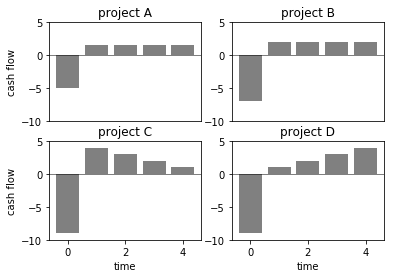

In [3]:
Periods = np.linspace(0, 4, 5)
V_CF = np.array([[-5.0, 1.5, 1.5, 1.5, 1.5],
                 [-7.0, 2.0, 2.0, 2.0, 2.0],
                 [-9.0, 4.0, 3.0, 2.0, 1.0],
                 [-9.0, 1.0, 2.0, 3.0, 4.0]])
V_Title = ['project A', 'project B', 'project C', 'project D']
fig1 = plt.figure(num=1, facecolor='w')
for fig_num in range(4):
    plt.subplot(2, 2, fig_num + 1)
    plt.bar(Periods, V_CF[fig_num, :], color=(0.5, 0.5, 0.5))
    plt.title(V_Title[fig_num])
    plt.axhline(color='k', linewidth=0.5)
    plt.ylim(-10, 5)
    if fig_num == 2 or fig_num == 3:
        plt.xlabel('time')
    if fig_num == 0 or fig_num == 2:
        plt.ylabel('cash flow')
    if fig_num == 1 or fig_num == 0:
        plt.xticks([])
plt.show()

In [4]:
r = 5
V_NPV = np.zeros(4)
for cf_num in range(4):
    V_NPV[cf_num] = NPV(r, V_CF[cf_num, :])
V_IRR = np.zeros(4)
for cf_num in range(4):
    V_IRR[cf_num] = IRR(V_CF[cf_num, :])

In [5]:
print(V_NPV)

[ 0.31892576  0.09190101  0.08098992 -0.3512374 ]


In [6]:
print(V_IRR)

[7.7138473  5.56378464 5.48356897 3.59611621]
